In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose
from torch.optim import lr_scheduler

In [2]:
from scripts.mnistParity import MNISTParity
from scripts.architecture import MLP
from scripts.train_utils import accuracy
from scripts.train import train_epoch, train_model, test_model
from scripts.plot_utils import plot_loss_accuracy, plotValAccuracy

In [3]:
print(torch.__version__)
print(np.__version__)

1.9.0
1.20.2


## Create Parity Data Iterator

### Vertical

In [4]:
transforms = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])

In [5]:
trainset = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transforms)
testset = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transforms)

In [6]:
learn_rate = 0.05
num_epochs = 20
batch_size = 128
loss_fn = torch.nn.CrossEntropyLoss()

### For k = 1

In [7]:
# k = 1
k = 1
model = MLP(k, "ReLU")
optimizer = torch.optim.Adadelta(model.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy, device="cuda:0", lr_scheduler=None)


Training on cuda:0
Epoch 1 completed. Loss - total: 50927.2059 - average: 0.8488; Performance: 0.9135
TESTING - loss 3024.1695642471313 - performance 0.9543


KeyboardInterrupt: 

In [ ]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

### For k = 3

In [ ]:
learn_rate = 0.05

k = 3
model3 = MLP(k)
optimizer = torch.optim.Adadelta(model3.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList3, trainAccList3, valLossList3, valAccList3  = train_model(model3, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy, device="cuda:0", lr_scheduler=None)


In [ ]:
plot_loss_accuracy(trainLostList3,valLossList3,trainAccList3,valAccList3,num_epochs)

In [ ]:
## Plain SGD didn't learn
## Tried with different parameters for momentum, dampening and nesterov, it didn't learn
learn_rate = 0.05
k = 3
model4 = MLP(k)
optimizer = torch.optim.SGD(model4.parameters(), lr=learn_rate, weight_decay = 0.01, momentum=0.9, dampening = 0.2)

trainLostList4, trainAccList4, valLossList4, valAccList4  = train_model(model4, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy, device="cuda:0", lr_scheduler=None)


In [ ]:
plot_loss_accuracy(trainLostList4,valLossList4,trainAccList4,valAccList4,num_epochs)

Activation: ReLU
Training on cuda:0
Epoch 1 completed. Loss - total: 145976.5114 - average: 2.4329; Performance: 0.5044
TESTING - loss 6992.971897125244 - performance 0.5090
Epoch 2 completed. Loss - total: 40663.3585 - average: 0.6777; Performance: 0.5535
TESTING - loss 6492.244780063629 - performance 0.6008
Epoch 3 completed. Loss - total: 37503.4817 - average: 0.6251; Performance: 0.6262
TESTING - loss 5975.923001766205 - performance 0.6602
Epoch 4 completed. Loss - total: 35428.6686 - average: 0.5905; Performance: 0.6653
TESTING - loss 5700.83612203598 - performance 0.6832
Epoch 5 completed. Loss - total: 34447.8915 - average: 0.5741; Performance: 0.6794
TESTING - loss 5554.011404514313 - performance 0.6945
Epoch 6 completed. Loss - total: 33474.6848 - average: 0.5579; Performance: 0.6944
TESTING - loss 5520.319640636444 - performance 0.6976
Epoch 7 completed. Loss - total: 32833.1746 - average: 0.5472; Performance: 0.7062
TESTING - loss 5362.677812576294 - performance 0.7109
Epoch

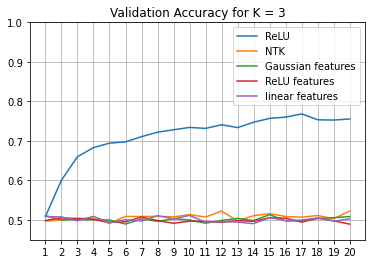

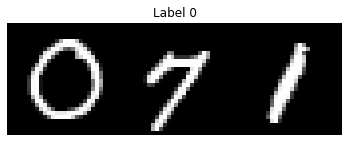

In [12]:
# Add Lazy methods
learn_rate = 0.05
K = 3
num_epochs = 20

fig = plt.figure()
for activation in ["ReLU", "NTK", "Gaussian features", "ReLU features", "linear features"]:
    model = MLP(K, activation)

    if "features" in activation:
        # deactivate the first layer
        optimizer = torch.optim.Adadelta(model.layer2.parameters(), lr = learn_rate, weight_decay=0.001)
    elif "NTK" in activation:
        paramsToUpdate = list(model.layer1.parameters()) + list(model.layer2.parameters())
        optimizer = torch.optim.Adadelta(paramsToUpdate, lr = learn_rate, weight_decay=0.001)
    else:
        optimizer = torch.optim.Adadelta(model.parameters(), lr = learn_rate, weight_decay=0.001)

    print("Activation:",activation)

    trainLostList, trainAccList, valLossList, valAccList  = train_model(model, K, trainset, testset, loss_fn, optimizer, num_epochs, 
                                                                        batch_size, validate_model = True, performance=accuracy, 
                                                                        device="cuda:0", lr_scheduler=None)

    plotValAccuracy(valAccList,num_epochs, activation, K)

fig.savefig(str(K) + "valAccuracy.png")
plt.show()
dataset = MNISTParity(trainset, K, 128)
dataset.plotRandomData()

# just need to find good lr and weight_decay values for lazy methods to have more similar plots to paper


In [ ]:
()